<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on SageMaker, Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [45]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [46]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [47]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('max_features', max_features)


print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
max_features 30979
Build model...


In [48]:
# You should only run this cell once your model has been properly configured

model.compile(loss='binary_crossentropy',
              optimizer='adam')

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1)

#score, acc = model.evaluate(X_test, y_test,
#                            batch_size=batch_size)
#print('Test score:', score)
#print('Test accuracy:', acc)

Train...
8982/8982 [==============================] - 215s 24ms/sample - loss: -114.9196


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

You need a consistent length for each observation.  In this example, the length needs to be 200 characters and those with lengths less than 200 are padded with zeros.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

After enough iterations, a typical neural network will start calculating prior gradients that are so small they effectively become zero - this is the vanishing gradient problem, and is what RNN with LSTM addresses.  The advantage of LSTM is that it can generally put more weight on recent (short-term) events while not completely losing older (long-term) information.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

RNN and LSTM are particularly useful for sequence or time-series data.  So, text is a good use case as it involves ordered data (letters and words in a certain series).  Speech is another good use case using ordered data.  Video classification/image captioning is another good use case for RNN's.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [5]:
!pip install google_images_download

  Using cached https://files.pythonhosted.org/packages/18/ed/0319d30c48f3653802da8e6dcfefcea6370157d10d566ef6807cceb5ec4d/google_images_download-2.8.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/80/d6/4294f0b4bce4de0abf13e17190289f9d0613b0a44e5dd6a7f5ca98459853/selenium-3.141.0-py2.py3-none-any.whl
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=72949a47561dda5129d05761c7649f0a977d764bc7679605499c174c4c2e5bc1
  Stored in directory: /Users/JKMacBook/Library/Caches/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [16]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "balloons", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = balloons
Evaluating...
Starting Download...


Unfortunately all 5 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [78]:
# You've got something to do in this cell. ;)

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import datasets
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [79]:
def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img, f_type):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for entry in results:
      if entry[1] == f_type:
        return entry[2]
    return 0.0

In [80]:
import requests

image_urls = ["https://github.com/JimKing100/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/module2-convolutional-neural-networks/frog1.jpeg",
              "https://github.com/JimKing100/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/module2-convolutional-neural-networks/frog2.jpeg"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

In [82]:
img_contains_frog(process_img_path('frog1.jpeg'), 'bullfrog')

[('n01641577', 'bullfrog', 0.67501384), ('n01644900', 'tailed_frog', 0.23260987), ('n01644373', 'tree_frog', 0.09233981)]


0.67501384

In [84]:
img_contains_frog(process_img_path('frog2.jpeg'), 'tree_frog')

[('n01644373', 'tree_frog', 0.6912601), ('n01644900', 'tailed_frog', 0.25871378), ('n01641577', 'bullfrog', 0.0497037)]


0.6912601

#### Stretch Goal: Displaying Predictions

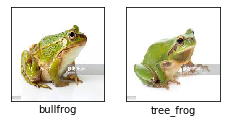

In [99]:
import matplotlib.pyplot as plt

images = []
class_names = []
images.append(process_img_path('frog1.jpeg'))
images.append(process_img_path('frog2.jpeg'))
class_names.append('bullfrog')
class_names.append('tree_frog')

plt.figure(figsize=(10,10))
for i in range(2):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
plt.show()


<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

Information retrieval is a use case for an autoencoder.  This would include a reverse image search or a recommendation system.  Dimmensionality reduction including feature extraction and manifold learning is another use case.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

My python and sql skills are currently my strengths.  

- What area of Data Science would you most like to learn more about, and why?

The area of Neural Networks is very deep an mysterious, but holds great potential in the future.

- Where do you think Data Science will be in 5 years?

I believe it will become a necessary part of all businesses within 5 years.  

- What are the threats posed by AI to our society?

AI raises a host of potential issues in society including privacy, use by authoritarian regimes, and personal rights.

- How do you think we can counteract those threats? 

The implementation of AI technology must be carefully considered by companies and governments.  Rules and regulations drafted by groups of citizens, government officials, ethics and privacy experts and other stakeholders must be considered.

- Do you think achieving General Artifical Intelligence is ever possible?

I don't believe we can or should create an artificial human, but there are many ways AI can benefit society.  Walking the tightrope between "good" uses and "bad" uses is going to be the tricky part!

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [12]:
from IPython.display import HTML

#HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")